# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

141

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + api_key + "&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6bdf9b1ed56e7a44083e33247bd294bc&q=


In [14]:
weather_list = []


for city in cities:
    try:
        #pprint(weather_json)
        weather_json = requests.get(query_url + city).json()
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        cityname = weather_json['name']
        humidity = weather_json['main']['humidity']
        windspeed = weather_json['wind']['speed']
        temp = weather_json['main']['temp_max']
        cloudiness = weather_json['clouds']['all']
        
        print(latitude)
        print(longitude)
        print(cityname)
        
        weather_list.append({'lat' : latitude,'long': longitude , 'city_name':cityname,
                             'Humidity' : humidity, 'Windspeed':windspeed, 'MaxTemp': temp,
                            'Cloudiness' : cloudiness})
        pprint(weather_json)
        
        
    except:
        print("City not found " + city)



-33.64
115.35
Busselton
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -33.64, 'lon': 115.35},
 'dt': 1559199562,
 'id': 2075265,
 'main': {'humidity': 26,
          'pressure': 1013,
          'temp': 294.24,
          'temp_max': 294.82,
          'temp_min': 293.71},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2011706,
         'message': 0.005,
         'sunrise': 1559171588,
         'sunset': 1559207958,
         'type': 3},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 6.992, 'speed': 12.77}}
48.72
-86.38
Marathon
{'base': 'stations',
 'clouds': {'all': 45},
 'cod': 200,
 'coord': {'lat': 48.72, 'lon': -86.38},
 'dt': 1559199562,
 'id': 6065867,
 'main': {'grnd_level': 968.71,
          'humidity': 65,
          'pressure': 1004.59,
          'sea_level': 1004.59,
          'temp': 280.612,
          'temp

73.51
80.55
Dikson
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 73.51, 'lon': 80.55},
 'dt': 1559199566,
 'id': 1507390,
 'main': {'grnd_level': 1010.37,
          'humidity': 92,
          'pressure': 1010.62,
          'sea_level': 1010.62,
          'temp': 273.912,
          'temp_max': 273.912,
          'temp_min': 273.912},
 'name': 'Dikson',
 'sys': {'country': 'RU', 'message': 0.0063, 'sunrise': 0, 'sunset': 0},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 61.385, 'speed': 8.79}}
22.08
-159.32
Kapaa
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -159.32},
 'dt': 1559199353,
 'id': 5848280,
 'main': {'humidity': 83,
          'pressure': 1018,
          'temp': 297.09,
          'temp_max': 300.15,
          'temp_min': 294.82},
 'name': 'Kapaa',
 'sys': {'country': 'US',
       

56.73
85.44
Oktyabrskoye
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 56.73, 'lon': 85.44},
 'dt': 1559199570,
 'id': 1511846,
 'main': {'humidity': 43,
          'pressure': 1002,
          'temp': 295.02,
          'temp_max': 295.37,
          'temp_min': 294.15},
 'name': 'Oktyabrskoye',
 'sys': {'country': 'RU',
         'id': 8961,
         'message': 0.0054,
         'sunrise': 1559165897,
         'sunset': 1559228008,
         'type': 1},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 8}}
38.18
-1.13
Fortuna
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 38.18, 'lon': -1.13},
 'dt': 1559199571,
 'id': 2517679,
 'main': {'humidity': 63,
          'pressure': 1025,
          'temp': 290.46,
          'temp_max': 293.15,
          'temp_min': 287.04},
 'name': 'Fortu

City not found korla
5.5
-4.06
Anyama
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 5.5, 'lon': -4.06},
 'dt': 1559199575,
 'id': 2292852,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Anyama',
 'sys': {'country': 'CI',
         'id': 1162,
         'message': 0.0052,
         'sunrise': 1559196091,
         'sunset': 1559240778,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 4.6}}
49.17
-101.8
Carnduff
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.17, 'lon': -101.8},
 'dt': 1559199345,
 'id': 5917349,
 'main': {'grnd_level': 941.11,
          'humidity': 49,
          'pressure': 1008.77,
          'sea_level': 1008.77,
          'temp': 291.31

City not found gurgan
-11.1
-77.61
Hualmay
{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': -11.1, 'lon': -77.61},
 'dt': 1559199579,
 'id': 3939761,
 'main': {'grnd_level': 1015.19,
          'humidity': 94,
          'pressure': 1017.38,
          'sea_level': 1017.38,
          'temp': 290.612,
          'temp_max': 290.612,
          'temp_min': 290.612},
 'name': 'Hualmay',
 'sys': {'country': 'PE',
         'message': 0.0052,
         'sunrise': 1559215347,
         'sunset': 1559256829},
 'timezone': -18000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 158.661, 'speed': 6.14}}
39.31
-74.98
Port Elizabeth
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 39.31, 'lon': -74.98},
 'dt': 1559199579,
 'id': 4501427,
 'main': {'humidity': 100,
          'pressure': 1007,
          'temp': 292.54,
          'temp_max': 294.15,
   

35.98
-114.83
Boulder City
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.98, 'lon': -114.83},
 'dt': 1559199587,
 'id': 5500539,
 'main': {'humidity': 33,
          'pressure': 1011,
          'temp': 294.68,
          'temp_max': 297.15,
          'temp_min': 292.59},
 'name': 'Boulder City',
 'sys': {'country': 'US',
         'id': 4664,
         'message': 0.0053,
         'sunrise': 1559132722,
         'sunset': 1559184505,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 2.1}}
62.45
-114.38
Yellowknife
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.45, 'lon': -114.38},
 'dt': 1559199587,
 'id': 6185377,
 'main': {'humidity': 85,
          'pressure': 1018,
          'temp': 273.15,
          'temp_max': 273.15,
          'temp_min': 273.15

30.04
-94.42
Nome
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.04, 'lon': -94.42},
 'dt': 1559199590,
 'id': 4732862,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 297.3,
          'temp_max': 299.82,
          'temp_min': 294.82},
 'name': 'Nome',
 'sys': {'country': 'US',
         'id': 3476,
         'message': 0.0051,
         'sunrise': 1559215063,
         'sunset': 1559265182,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 152.876, 'speed': 1.79}}
City not found mochitlan
City not found tumannyy
City not found lolua
15.86
-97.07
Puerto Escondido
{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': 15.86, 'lon': -97.07},
 'dt': 1559199591,
 'id': 3520994,
 'main': {'grnd_level': 997.4,
          'humidity': 76,
          'pressure': 1010.6

5.56
95.32
Banda Aceh
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 5.56, 'lon': 95.32},
 'dt': 1559199595,
 'id': 1215502,
 'main': {'grnd_level': 1009.05,
          'humidity': 67,
          'pressure': 1008.69,
          'sea_level': 1008.69,
          'temp': 302.812,
          'temp_max': 302.812,
          'temp_min': 302.812},
 'name': 'Banda Aceh',
 'sys': {'country': 'ID',
         'message': 0.0054,
         'sunrise': 1559172233,
         'sunset': 1559216929},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 232.187, 'speed': 2.91}}
77.48
-69.36
Qaanaaq
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1559199595,
 'id': 3831208,
 'main': {'grnd_level': 974.31,
          'humidity': 64,
          'pressure': 1024.78,
          'sea_level': 1024.78,
          'temp': 27

-33.59
22.2
Oudtshoorn
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.59, 'lon': 22.2},
 'dt': 1559199599,
 'id': 967106,
 'main': {'humidity': 45,
          'pressure': 1014,
          'temp': 292.15,
          'temp_max': 292.15,
          'temp_min': 292.15},
 'name': 'Oudtshoorn',
 'sys': {'country': 'ZA',
         'id': 1918,
         'message': 0.005,
         'sunrise': 1559193947,
         'sunset': 1559230316,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 3.1}}
35.76
139.74
Kita
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.76, 'lon': 139.74},
 'dt': 1559199599,
 'id': 1850144,
 'main': {'humidity': 38,
          'pressure': 1012,
          'temp': 298.29,
          'temp_max': 300.37,
          'temp_min': 295.93},
 'name': 'Kita',
 'sys':

39.45
22.34
Saint George
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.45, 'lon': 22.34},
 'dt': 1559199604,
 'id': 262462,
 'main': {'humidity': 36,
          'pressure': 1017,
          'temp': 297.59,
          'temp_max': 299.15,
          'temp_min': 296.15},
 'name': 'Saint George',
 'sys': {'country': 'GR',
         'id': 6607,
         'message': 0.0058,
         'sunrise': 1559185610,
         'sunset': 1559238585,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 2.6}}
-14.48
-70.64
Nunoa
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': -14.48, 'lon': -70.64},
 'dt': 1559199605,
 'id': 3934233,
 'main': {'grnd_level': 586.85,
          'humidity': 73,
          'pressure': 1023.2,
          'sea_level': 1023.2,
          'temp': 272.012,
          

In [5]:
print(weather_list)

[{'lat': -33.64, 'long': 115.35, 'city_name': 'Busselton'}, {'lat': 48.72, 'long': -86.38, 'city_name': 'Marathon'}, {'lat': -37.83, 'long': 140.78, 'city_name': 'Mount Gambier'}, {'lat': -42.48, 'long': -73.76, 'city_name': 'Castro'}, {'lat': 26.5, 'long': 90.7, 'city_name': 'Bijni'}, {'lat': 42.65, 'long': -73.75, 'city_name': 'Albany'}, {'lat': 15.34, 'long': 74.49, 'city_name': 'Vaini'}, {'lat': 4.26, 'long': 117.89, 'city_name': 'Tawau'}, {'lat': -4.97, 'long': 39.83, 'city_name': 'Micheweni'}, {'lat': 63.23, 'long': 52.89, 'city_name': 'Borovoy'}, {'lat': 16.23, 'long': 120.49, 'city_name': 'Subusub'}, {'lat': 60.91, 'long': -46.05, 'city_name': 'Narsaq'}, {'lat': 73.51, 'long': 80.55, 'city_name': 'Dikson'}, {'lat': 22.08, 'long': -159.32, 'city_name': 'Kapaa'}, {'lat': -54.81, 'long': -68.31, 'city_name': 'Ushuaia'}, {'lat': 41.84, 'long': 60.39, 'city_name': 'Gurlan'}, {'lat': -46.43, 'long': -67.52, 'city_name': 'Mar del Plata'}, {'lat': 60.14, 'long': -45.24, 'city_name': 'N

In [15]:
df = pd.DataFrame(weather_list)
df.head()

,Cloudiness,Humidity,MaxTemp,Windspeed,city_name,lat,long
0,100,26,294.820,12.77,Busselton,-33.64,115.35
1,45,65,280.612,3.62,Marathon,48.72,-86.38
2,90,81,284.150,5.10,Mount Gambier,-37.83,140.78
3,90,100,280.150,1.50,Castro,-42.48,-73.76
4,32,56,306.412,3.79,Bijni,26.50,90.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
df = pd.DataFrame(weather_list)
df.head()

,Cloudiness,Humidity,MaxTemp,Windspeed,city_name,lat,long
0,100,26,294.820,12.77,Busselton,-33.64,115.35
1,45,65,280.612,3.62,Marathon,48.72,-86.38
2,90,81,284.150,5.10,Mount Gambier,-37.83,140.78
3,90,100,280.150,1.50,Castro,-42.48,-73.76
4,32,56,306.412,3.79,Bijni,26.50,90.70


In [33]:
df.count()

Cloudiness    117
Humidity      117
MaxTemp       117
Windspeed     117
city_name     117
lat           117
long          117
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

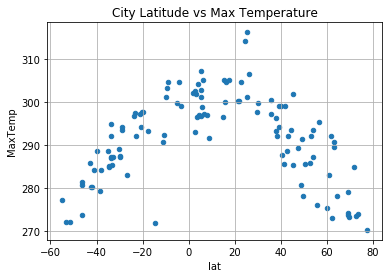

In [39]:
df.plot(x = 'lat', y = 'MaxTemp', kind = 'scatter', title = "City Latitude vs Max Temperature", grid = True)

#### Latitude vs. Humidity Plot

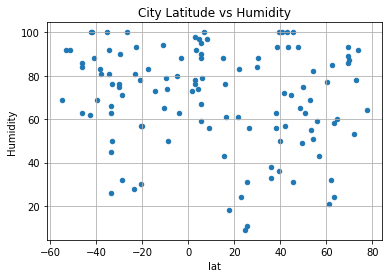

In [40]:
df.plot(x = 'lat', y = 'Humidity', kind = 'scatter', title = "City Latitude vs Humidity", grid = True)

#### Latitude vs. Cloudiness Plot

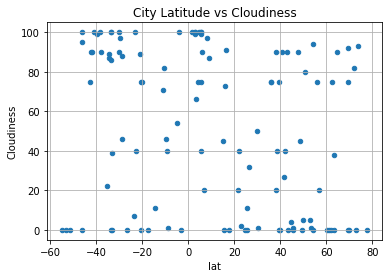

In [41]:
df.plot(x = 'lat', y = 'Cloudiness', kind = 'scatter', title = "City Latitude vs Cloudiness", grid = True)

#### Latitude vs. Wind Speed Plot

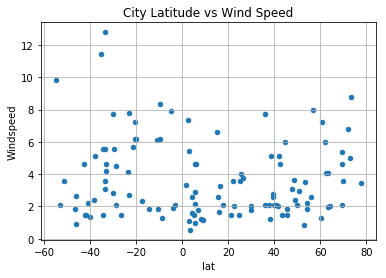

In [42]:
df.plot(x = 'lat', y = 'Windspeed', kind = 'scatter', title = "City Latitude vs Wind Speed", grid = True)